In [3]:
import pandas as pd

In [4]:
vref = 40594.2
df = pd.read_csv('vi.csv')
df.describe()

,v,i
count,2000.000000,2000.000000
mean,40617.512000,40608.496000
std,12979.982111,1953.797976
min,22448.000000,37648.000000
25%,27604.000000,38656.000000
50%,40560.000000,40624.000000
75%,53520.000000,42532.000000
max,58736.000000,43536.000000


<AxesSubplot:>

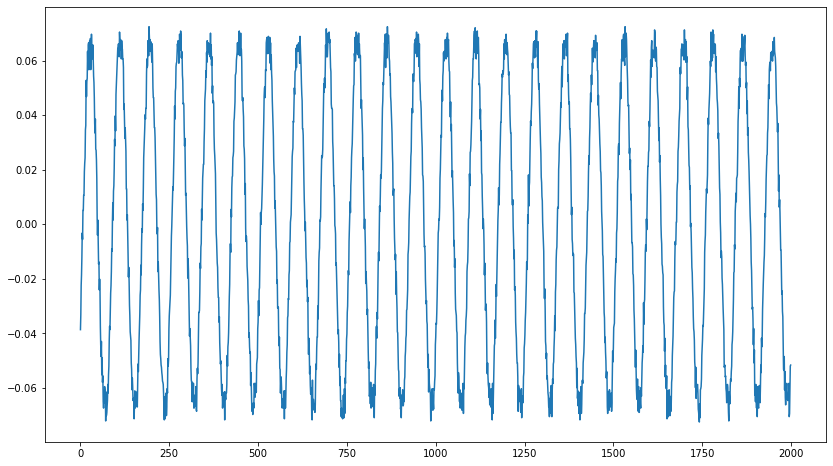

In [5]:
df['v'] =  (df.v - vref) / vref
df['i'] =  (df.i - vref) / vref
df.i.plot(figsize=(14,8))

<AxesSubplot:>

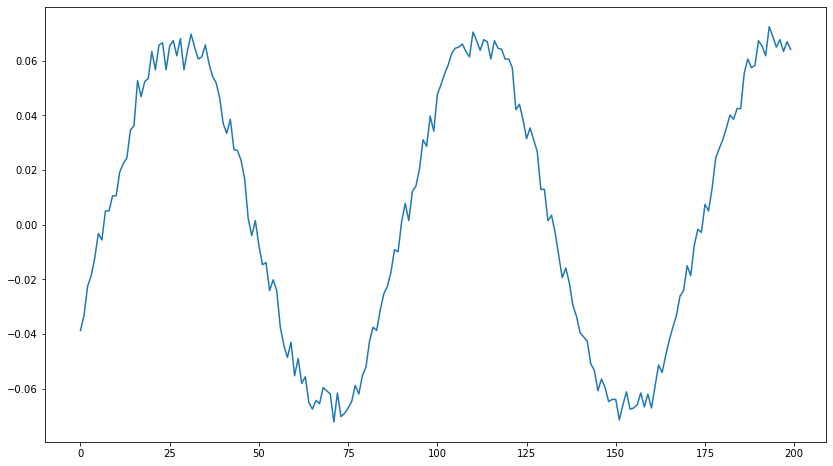

In [6]:
df[:200].i.plot(figsize=(14,8))

<AxesSubplot:>

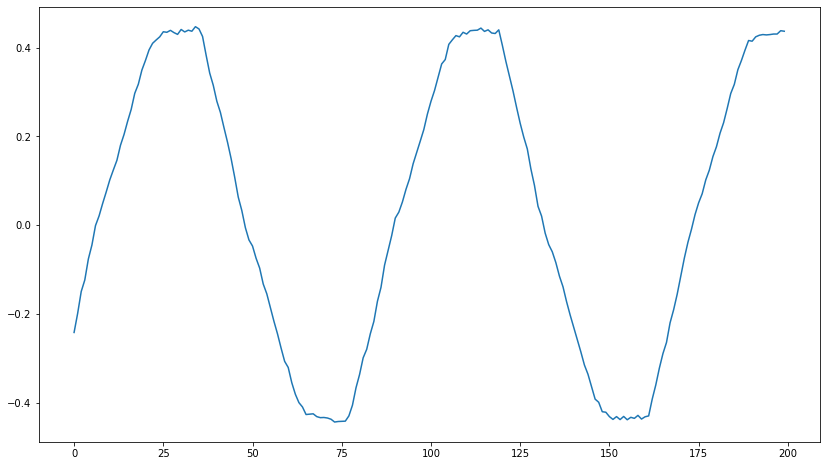

In [7]:
df[:200].v.plot(figsize=(14,8))

<AxesSubplot:>

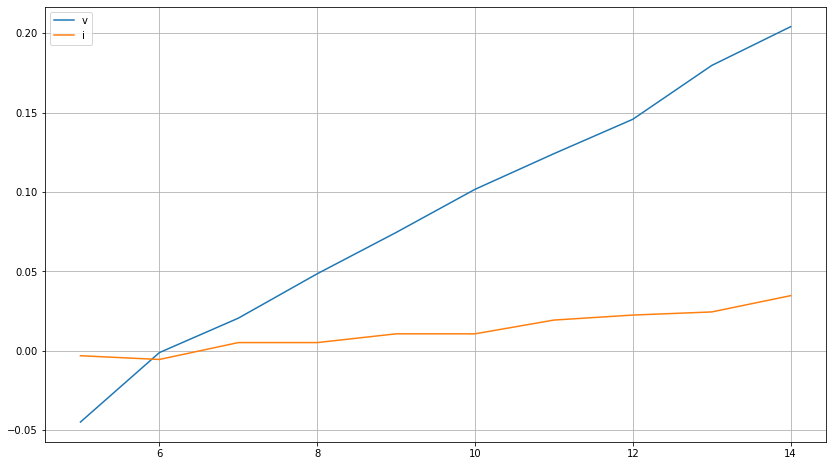

In [8]:
df[5:15].plot(grid=True, figsize=(14,8))


In [9]:
((df.v * df.i) * 25159).mean() / 20

19.28586330275683

In [10]:
#df['i1'] = df.i.shift(1)
#df['v1'] = df.v.shift(1)
df.corr()

,v,i
v,1.000000,0.996693
i,0.996693,1.000000


In [11]:
import numpy, scipy.optimize, math

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

In [12]:
fit_v = fit_sin(range(len(df)), df.v.values)
fit_v

{'amp': 0.45118163727324095,
 'omega': 0.07526399658540095,
 'phase': -0.5386811436128778,
 'offset': 5.089506140592512e-05,
 'freq': 0.011978637093418093,
 'period': 83.48195142746836,
 'fitfunc': <function __main__.fit_sin.<locals>.<lambda>(t)>,
 'maxcov': 7.40880915221111e-06,
 'rawres': (array([0.45208126, 0.07539822, 0.        , 0.00057427]),
  array([ 4.51181637e-01,  7.52639966e-02, -5.38681144e-01,  5.08950614e-05]),
  array([[ 3.80459327e-07,  2.34992945e-12, -3.80743378e-09,
          -4.33100112e-10],
         [ 2.34992945e-12,  5.61579029e-12, -5.57718490e-09,
           2.18235005e-11],
         [-3.80743378e-09, -5.57718490e-09,  7.40880915e-06,
          -2.05343678e-08],
         [-4.33100112e-10,  2.18235005e-11, -2.05343678e-08,
           1.90365598e-07]]))}

In [13]:
fit_i = fit_sin(range(len(df)), df.i.values)
fit_i

{'amp': 0.06782729803840129,
 'omega': 0.07526173265389205,
 'phase': -0.5316586118717103,
 'offset': 0.00027261062731507674,
 'freq': 0.01197827677752763,
 'period': 83.48446262955734,
 'fitfunc': <function __main__.fit_sin.<locals>.<lambda>(t)>,
 'maxcov': 1.2445837186978676e-05,
 'rawres': (array([0.06804905, 0.07539822, 0.        , 0.00035217]),
  array([ 6.78272980e-02,  7.52617327e-02, -5.31658612e-01,  2.72610627e-04]),
  array([[ 1.44427491e-08,  6.31141390e-13, -1.00452808e-09,
          -1.66092792e-11],
         [ 6.31141390e-13,  9.43363645e-12, -9.36894460e-09,
           5.47931032e-12],
         [-1.00452808e-09, -9.36894460e-09,  1.24458372e-05,
          -5.14805739e-09],
         [-1.66092792e-11,  5.47931032e-12, -5.14805739e-09,
           7.22658340e-09]]))}

In [14]:
fit_v['phase'] / fit_v['omega'] - fit_i['phase'] / fit_i['omega']

-0.09309283793188072